In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 1. 법정동 코드 가공

In [4]:
locCode = pd.read_excel('data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [5]:
locCode['지역코드'] = locCode['법정동코드'].astype(str).str.slice(start=0, stop=5).astype(int)
locCode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   법정동코드   20556 non-null  int64  
 1   시도명     20556 non-null  object 
 2   시군구명    20387 non-null  object 
 3   읍면동명    20270 non-null  object 
 4   동리명     15222 non-null  object 
 5   생성일자    20556 non-null  int64  
 6   말소일자    0 non-null      float64
 7   지역코드    20556 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 1.2+ MB


In [6]:
locCode_1 = locCode[locCode['시도명']=='서울특별시'][['시군구명','지역코드']]
locCode_1.rename(columns={'시군구명':'구'}, inplace=True)
locCode_1 = locCode_1[locCode_1['구'].notnull()]
locCode_1

,구,지역코드
1,종로구,11110
2,종로구,11110
3,종로구,11110
4,종로구,11110
5,종로구,11110
...,...,...
488,강동구,11740
489,강동구,11740
490,강동구,11740
491,강동구,11740


## 2. 실거래가 데이터 가공

In [7]:
apt = pd.read_csv('data/2019년 서울 아파트 실거래가.csv', encoding="cp949")

In [8]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경..int64로
apt['거래금액'] = apt['거래금액'].astype(str).str.replace(pat=',', repl='', regex=False).astype(np.int64)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  int64  
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 5.8+ MB


In [9]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt['전용면적(평)']=apt['전용면적']/3.306
apt['전용면적(평)']=apt['전용면적(평)'].round(decimals=2)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [10]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
# 컬럼명 전용면적2(평)
apt['전용면적(평)2']=apt['전용면적(평)'].astype(int)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45


In [11]:
# 전용면적을 범주화 합니다.
# 컬럼명은 전용면적(평)3
bins=np.arange(0,86,5)
bins
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], bins)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]"
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]"
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]"
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]"


In [12]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [13]:
apt['평당가격'] = (apt['거래금액']/apt['전용면적(평)2']).round().astype(int)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,평당가격
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",3621
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",3306
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",3051
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",2705
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",3556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",3625
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",3190
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",3112
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",3200


## 3. 데이타 프레임 병합

In [14]:
result = pd.merge(locCode_1, apt, on=['지역코드'])
result.drop_duplicates(inplace=True)
result.head(1)

,구,지역코드,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,평당가격
0,종로구,11110,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",3621


## 4. 데이타 분석


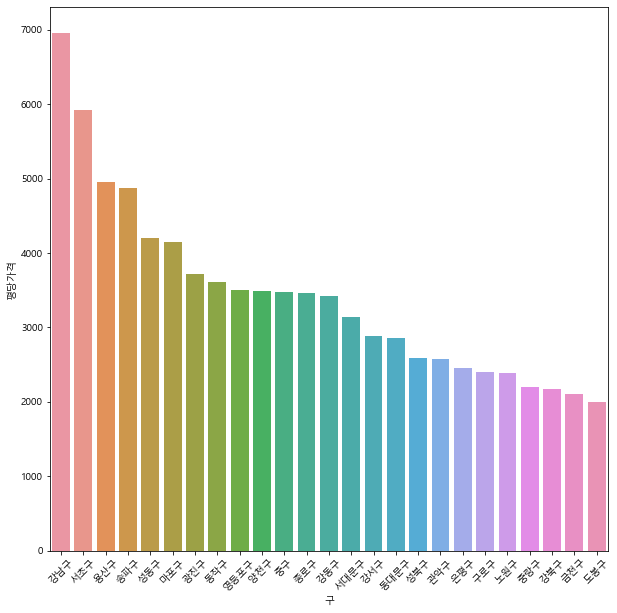

In [15]:
#1. 구별 평균평당 가격
result_1=result.pivot_table(values='평당가격', index=['구']).reset_index()
result_1['평당가격']=result_1['평당가격'].astype(int)
result_1=result_1.sort_values(by='평당가격',ascending=False).reset_index().drop('index', axis=1)
result_1=result_1
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(x='구', y='평당가격', data=result_1)


In [16]:
#2. 층별 평당가격
result['평당가격']=result['평당가격'].astype(int)
result_floor=result.pivot_table(values='평당가격', index=['구'], columns=['층'])
result_floor=result_floor.fillna(0).astype(int)
result_floor.head(1)

층,-2,-1,1,2,3,4,5,6,7,8,...,54,55,56,57,58,61,62,65,66,67
구,,,,,,,,,,,,,,,,,,,,,
강남구,0,3141,7264,7371,7234,6996,7433,6648,6591,6644,...,5864,0,5625,6304,5689,5308,6071,0,5325,5918


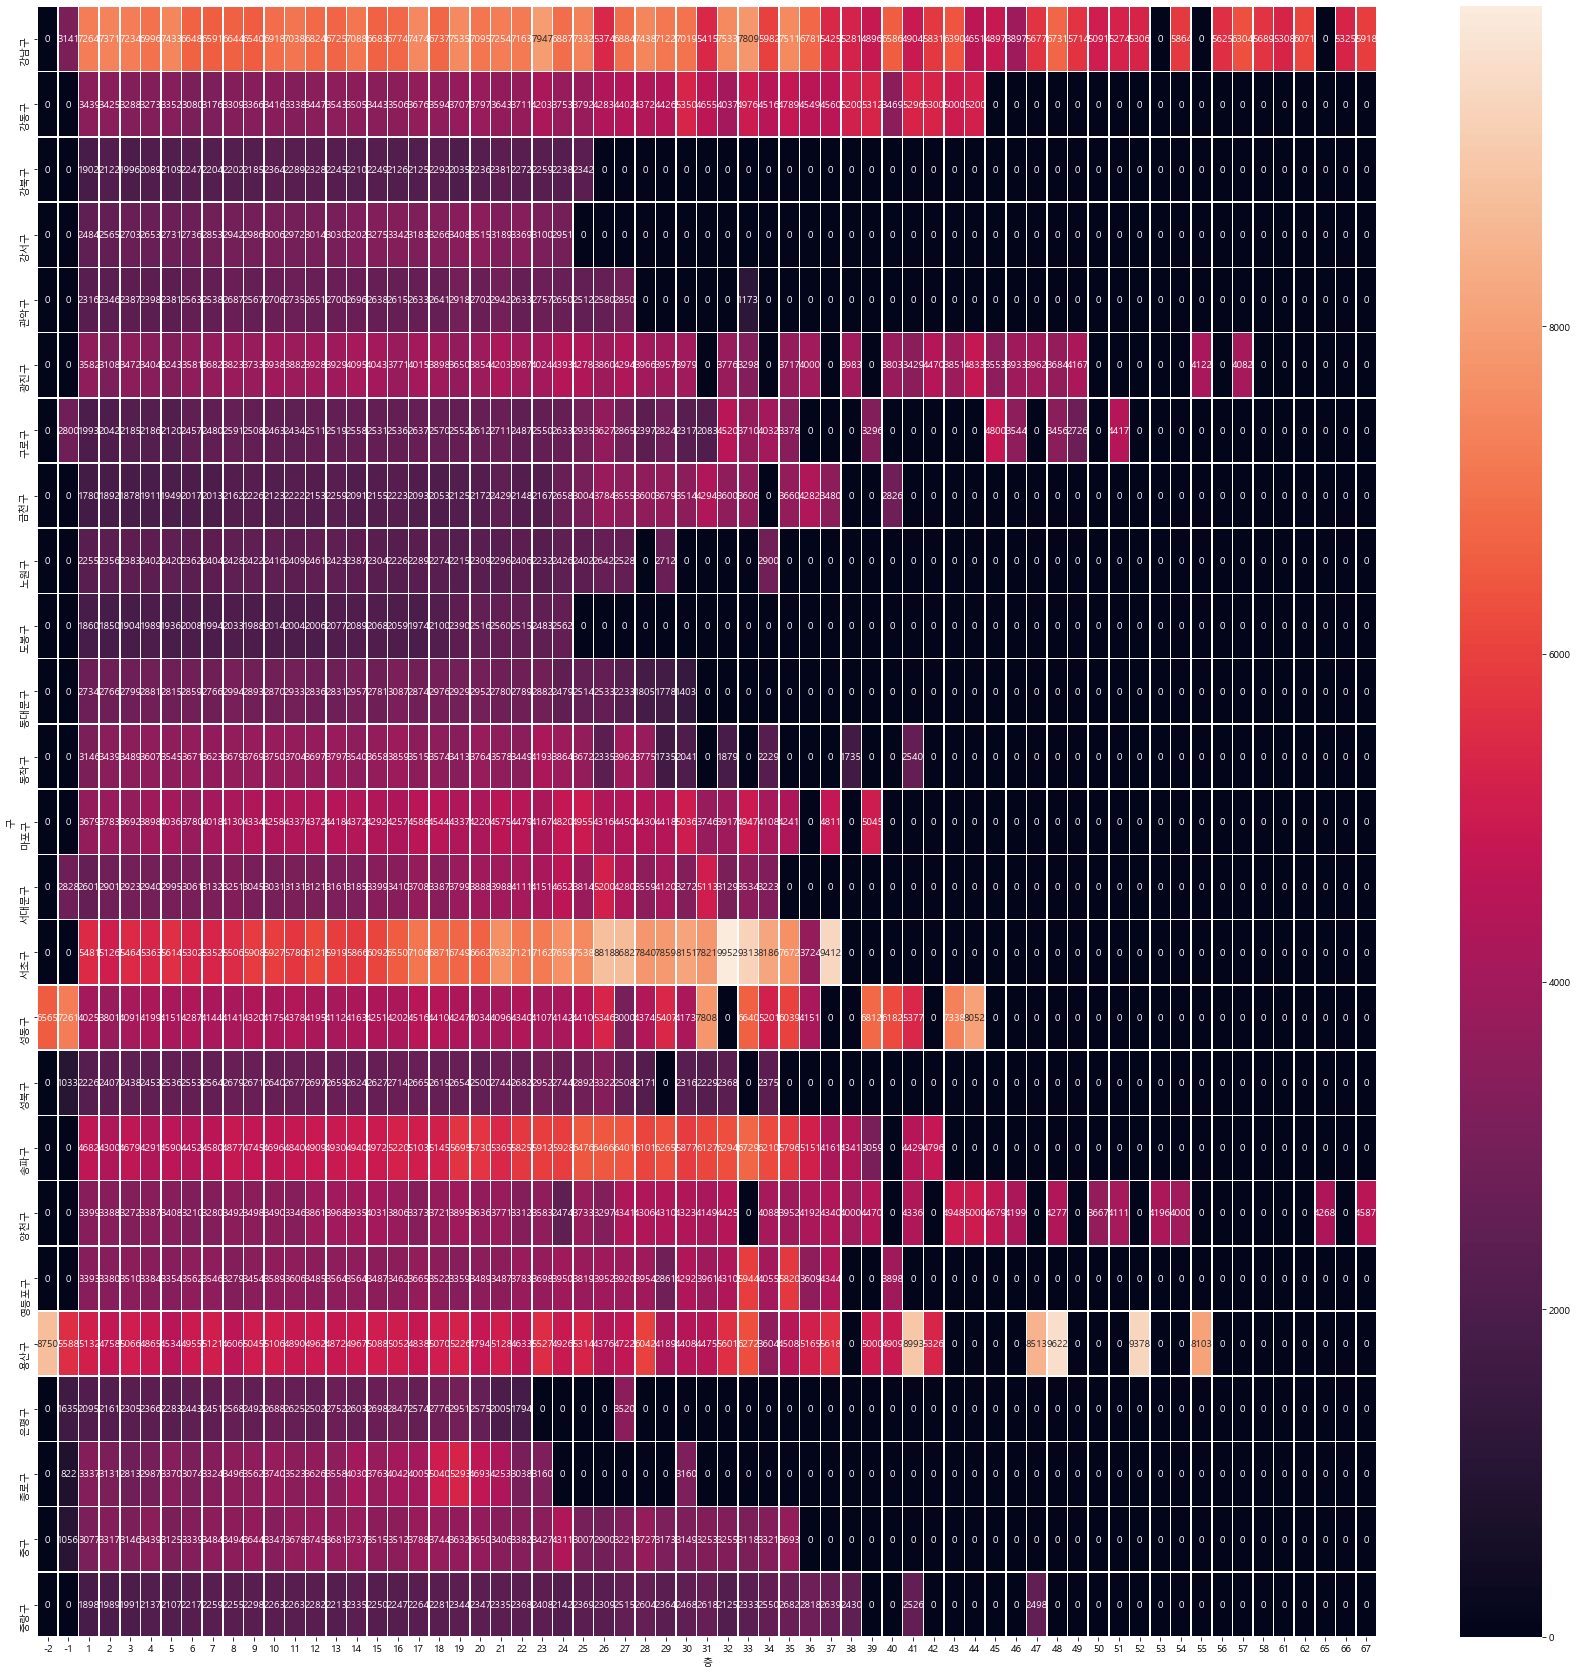

In [17]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(result_floor, annot=True, fmt="d", linewidths=.5, ax=ax)

In [18]:
#3. 평수별 거래량
result.head()
result3=result.pivot_table(values='평당가격', index='전용면적(평)3',aggfunc='count').reset_index()
result3=result3.rename(columns={'평당가격':'거래량'})
result3

,전용면적(평)3,거래량
0,"(0, 5]",1419
1,"(5, 10]",2064
2,"(10, 15]",6581
3,"(15, 20]",19147
4,"(20, 25]",26612
5,"(25, 30]",2051
6,"(30, 35]",4851
7,"(35, 40]",2739
8,"(40, 45]",1296
9,"(45, 50]",862


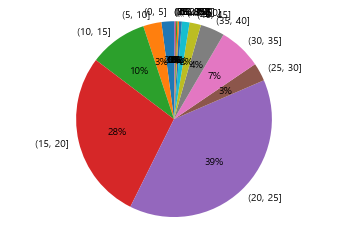

In [19]:
labels = result3['전용면적(평)3']
sizes = result3['거래량']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()


In [20]:
#4. 구별 거래량
result.head()
result4=result.pivot_table(values='평당가격', index='구',aggfunc='count').reset_index()
result4=result4.rename(columns={'평당가격':'거래량'})
result4

,구,거래량
0,강남구,4341
1,강동구,3760
2,강북구,1191
3,강서구,3318
4,관악구,2128
5,광진구,1621
6,구로구,3246
7,금천구,1423
8,노원구,6633
9,도봉구,2713


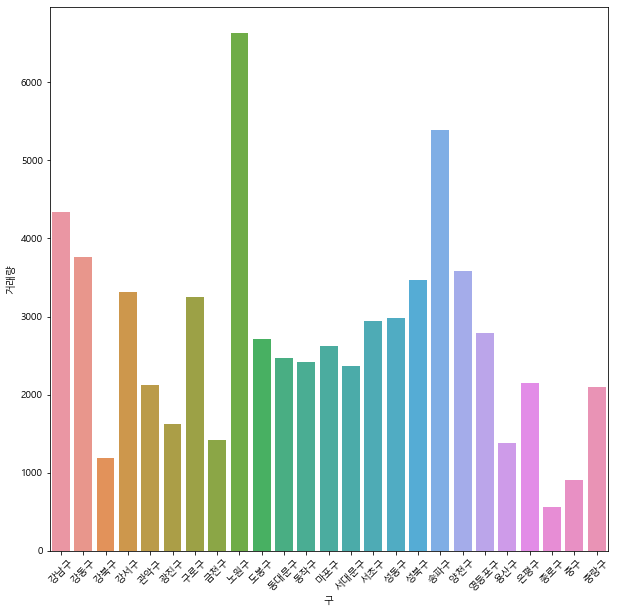

In [21]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(x='구', y='거래량', data=result4)

In [22]:
#5.월별 거래량
result.head()
result5=result.pivot_table(values='평당가격', index='거래월',aggfunc='count').reset_index()
result5=result5.rename(columns={'평당가격':'거래량'})
result5

,거래월,거래량
0,1,1701
1,2,1454
2,3,2274
3,4,3010
4,5,4392
5,6,6799
6,7,8802
7,8,6597
8,9,6996
9,10,11486


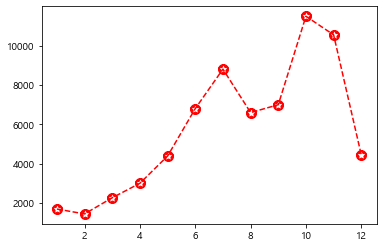

In [23]:
star = mpath.Path.unit_regular_star(5)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)
plt.plot(result5['거래월'],result5['거래량'], '--r', marker=cut_star, markersize=10)
plt.show()

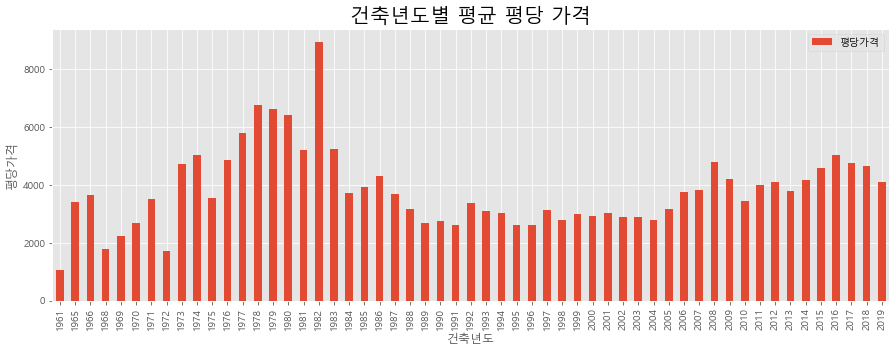

In [24]:
#6. 건축년도별 평균 평당 가격
mean_price_by_year = result.pivot_table('평당가격', index='건축년도')
mean_price_by_year.head()
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 5)
ax = mean_price_by_year.plot(kind='bar')
ax.set_title("건축년도별 평균 평당 가격", fontsize=20)
ax.set_xlabel("건축년도")
ax.set_ylabel("평당가격")
ax.legend(loc='best')
plt.show()

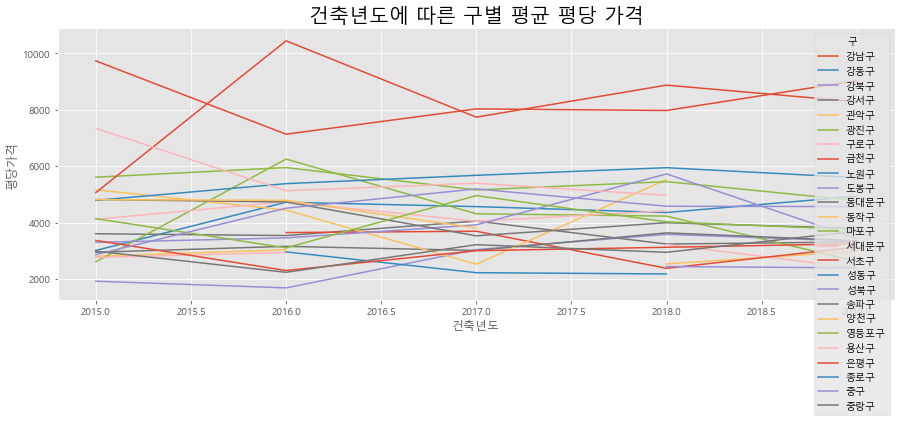

In [25]:
#7.건축년도에 따른 구별 평균 평당 가격
mean_price_by_year_hue_gu = result.pivot_table('평당가격', index='건축년도', columns='구').sort_values('건축년도', ascending=False).head()
mean_price_by_year_hue_gu
ax = mean_price_by_year_hue_gu.plot()
ax.set_title("건축년도에 따른 구별 평균 평당 가격", fontsize=20)
ax.set_xlabel("건축년도")
ax.set_ylabel("평당가격")
plt.show()

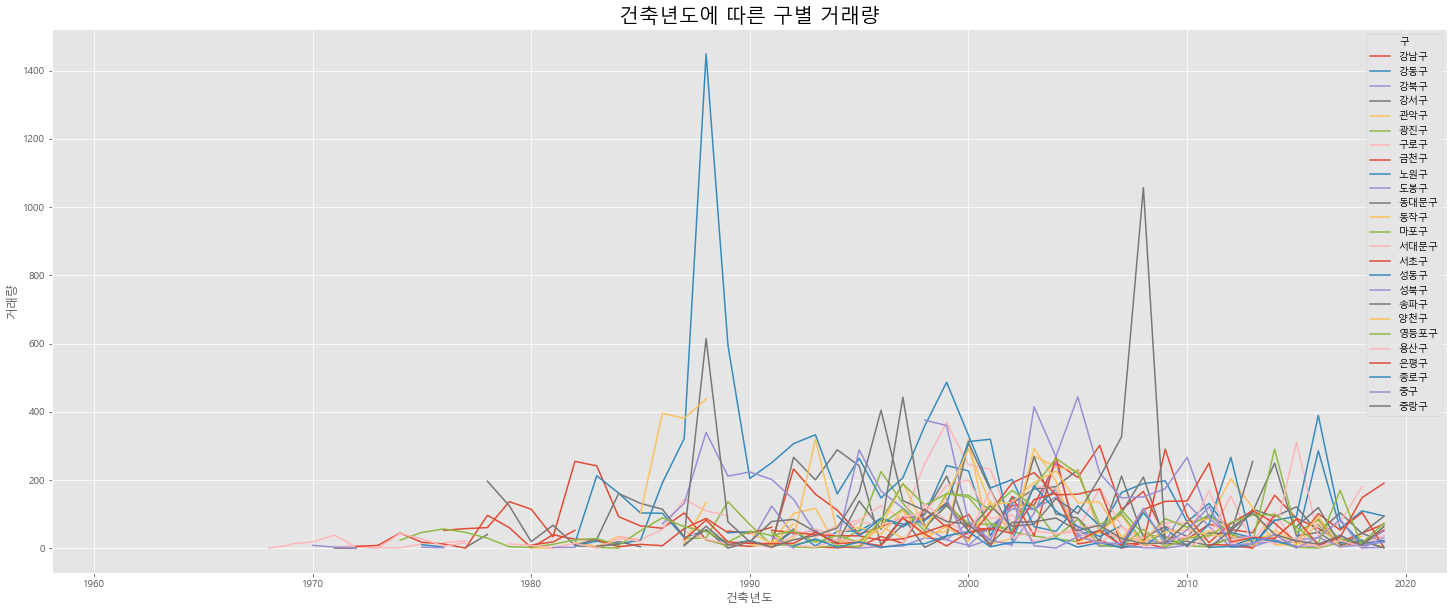

In [26]:
# 8.건축년도에 따른 구별 거래량
count_by_year_hue_gu = result.pivot_table('평당가격', index='건축년도', columns='구', aggfunc='count')
count_by_year_hue_gu
plt.rcParams["figure.figsize"] = (25, 10)
ax = count_by_year_hue_gu.plot()
ax.set_title("건축년도에 따른 구별 거래량", fontsize=20)
ax.set_xlabel("건축년도")
ax.set_ylabel("거래량")
plt.show()

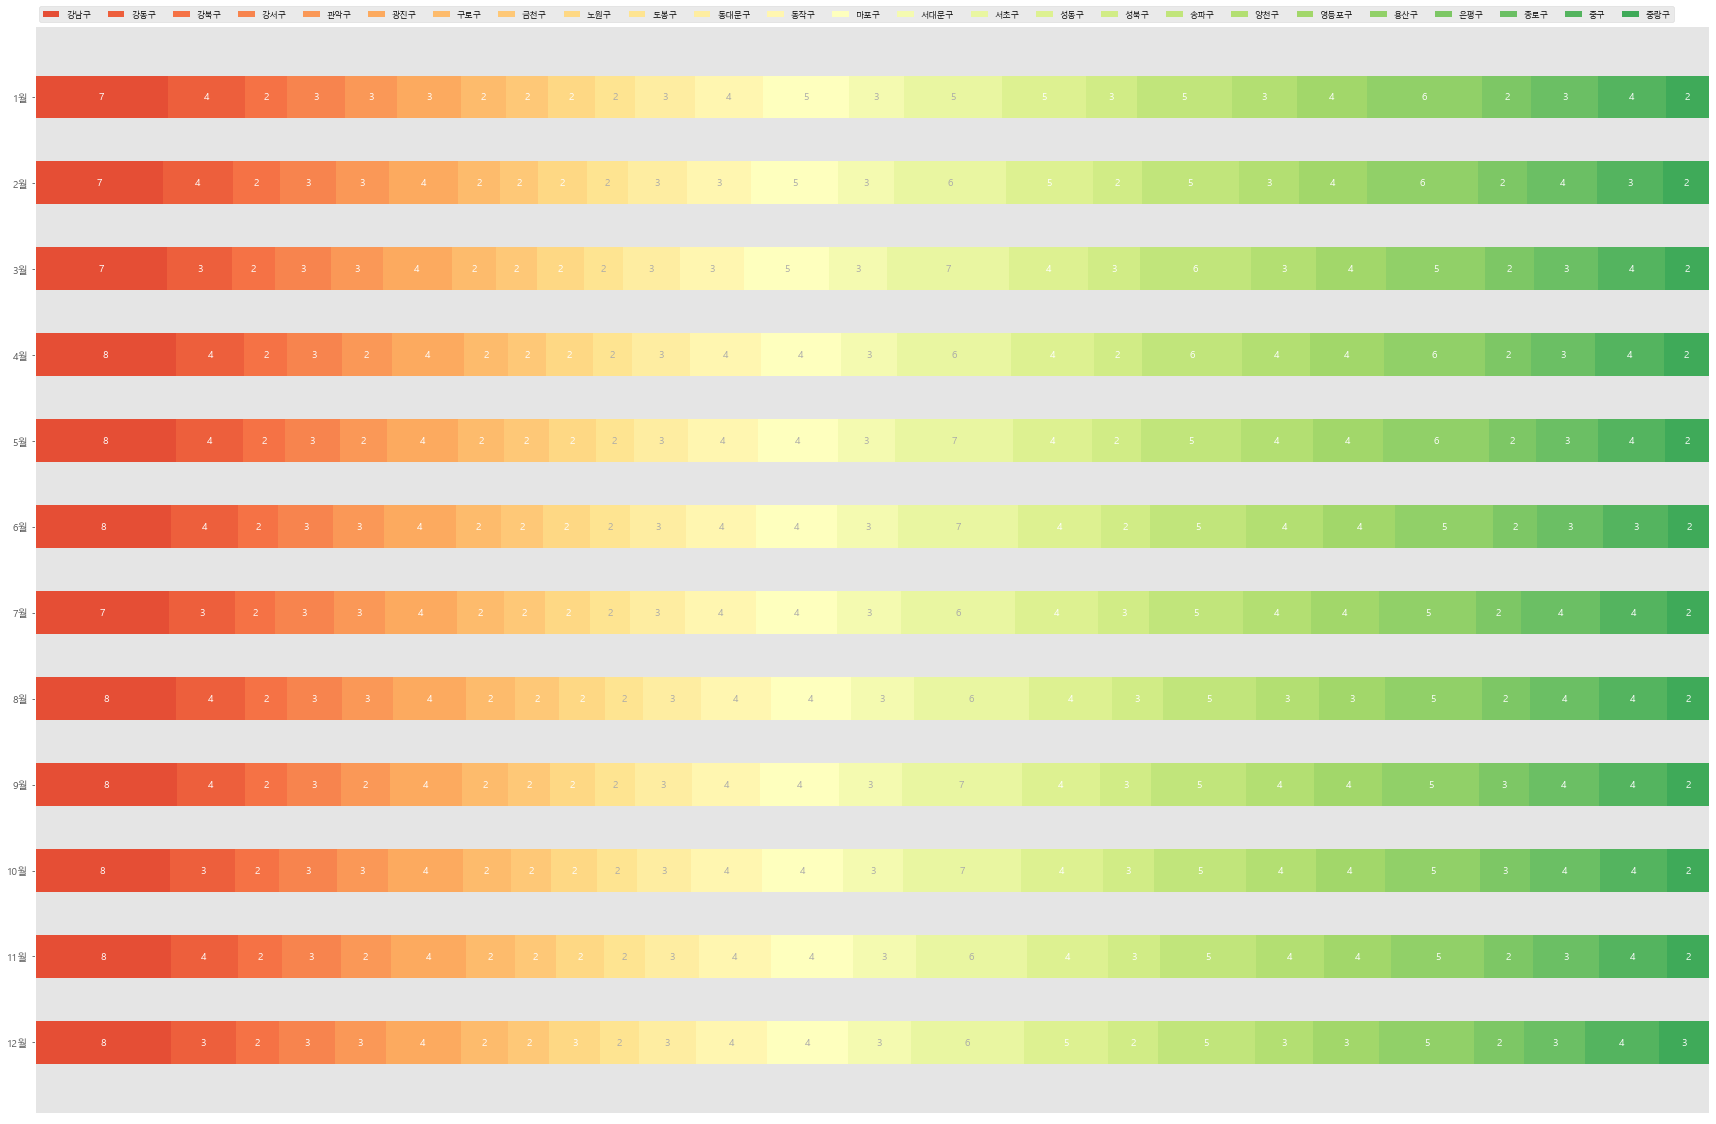

In [27]:
#9.거래월별,구별 평균 평당 가격
mean_price_by_month_hue_gu = result.pivot_table('평당가격', index=['구','거래월'])
mean_price_by_month_hue_gu = mean_price_by_month_hue_gu.reset_index()
mean_price_by_month_hue_gu['평당가격'] = mean_price_by_month_hue_gu['평당가격'].astype(int)
mean_price_by_month_hue_gu
category_names = mean_price_by_month_hue_gu['구'].unique()
results = {
    '1월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==1]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==1]['평당가격'])*100,
    '2월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==2]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==2]['평당가격'])*100,
    '3월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==3]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==3]['평당가격'])*100,
    '4월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==4]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==4]['평당가격'])*100,
    '5월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==5]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==5]['평당가격'])*100,
    '6월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==6]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==6]['평당가격'])*100,
    '7월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==7]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==7]['평당가격'])*100,
    '8월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==8]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==8]['평당가격'])*100,
    '9월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==9]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==9]['평당가격'])*100,
    '10월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==10]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==10]['평당가격'])*100,
    '11월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==11]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==11]['평당가격'])*100,
    '12월' : mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==12]['평당가격']/sum(mean_price_by_month_hue_gu[mean_price_by_month_hue_gu['거래월']==12]['평당가격'])*100
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(30, 20))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

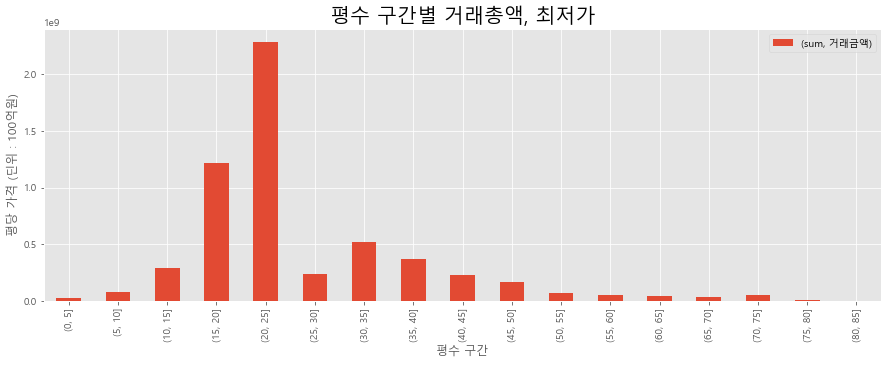

In [29]:
# 평수 계급별 거래총액

sum_price = result.pivot_table(values=['거래금액'], aggfunc=['sum'], index = ['전용면적(평)3'])
sum_price

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 5)
ax = sum_price.plot(kind='bar')
ax.set_title("평수 구간별 거래총액, 최저가", fontsize=20)
ax.set_xlabel("평수 구간")
ax.set_ylabel("평당 가격 (딘위 : 100억원)")
ax.legend(loc='best')
plt.show()

             count
              평당가격
구   전용면적(평)3      
강남구 (0, 5]      22
    (5, 10]    238
    (10, 15]   423
    (15, 20]   639
    (20, 25]  1392
...            ...
중랑구 (30, 35]   118
    (35, 40]    75
    (40, 45]     3
    (45, 50]     3
    (60, 65]     1

[326 rows x 1 columns]


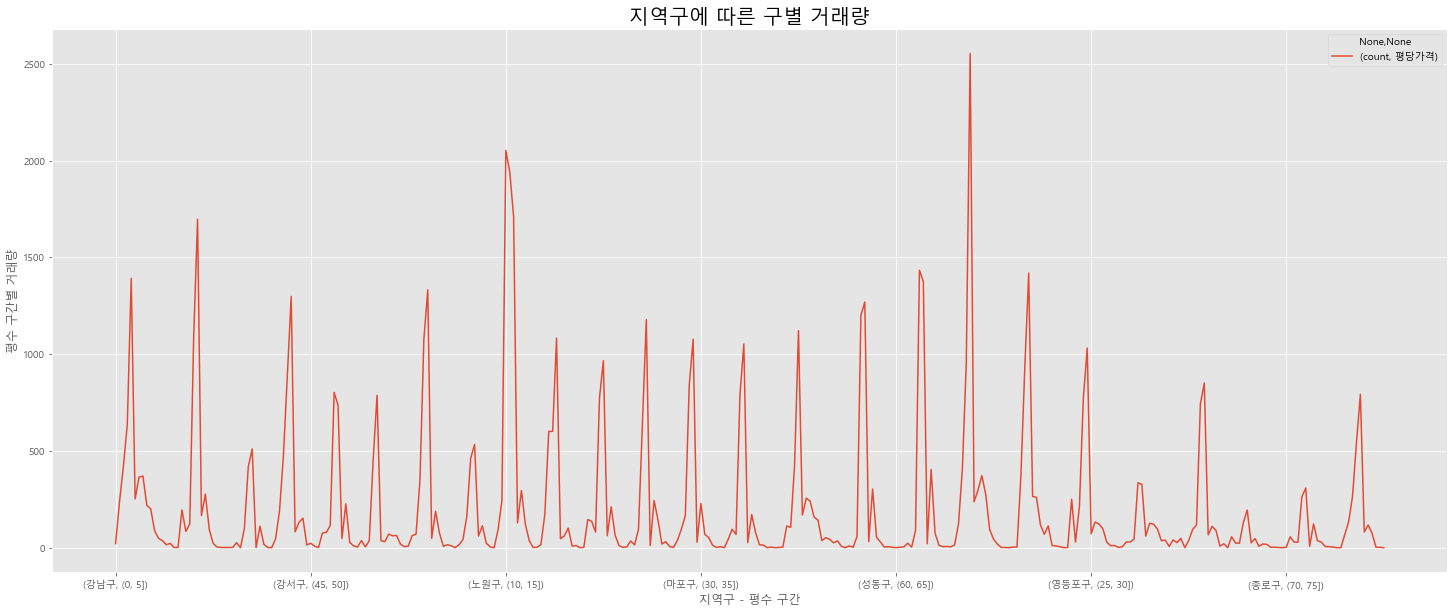

In [38]:
# 지역구 전용면적의 거래량

volume = result.pivot_table(values=['평당가격'], aggfunc=['count'], index = ['구', '전용면적(평)3'])
print(volume)

plt.rcParams["figure.figsize"] = (25, 10)
ax = volume.plot()
ax.set_title("지역구에 따른 구별 거래량", fontsize=20)
ax.set_xlabel("지역구 - 평수 구간")
ax.set_ylabel("평수 구간별 거래량")
plt.show()

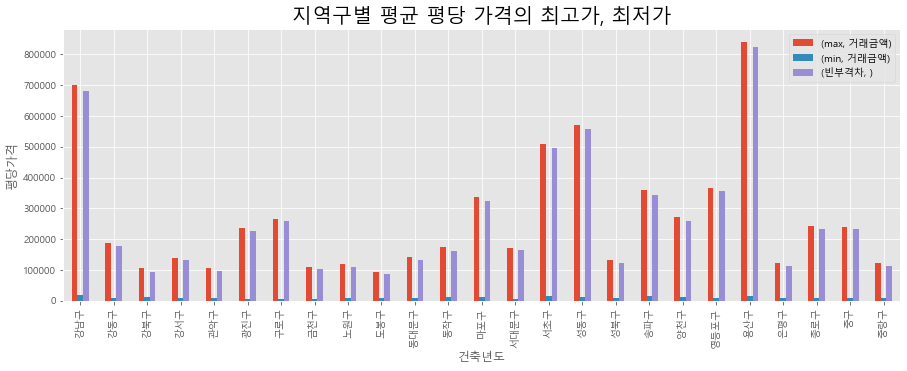

In [31]:
# 지역구 전용면적대비 최고가-최저가

def get_Max(data):
    max = 0
    
    for e in data:
        if max < e:
            max = e
            
    return max

def get_Min(data):
    min = data[0]
    
    for e in data:
        if min > e:
            min = e
    
    return min

# max_value = result.pivot_table(values=['거래금액'], aggfunc=['max'], index = ['구']).values
# min_value = result.pivot_table(values=['거래금액'], aggfunc=['min'], index = ['구']).values
# gu = result.pivot_table(values=['거래금액'], aggfunc=['max'], index = ['구']).index

max_min = result.pivot_table(values=['거래금액'], aggfunc=['max', 'min'], index = ['구'])

max_min['빈부격차'] = (max_min['max'] - max_min['min'])
max_min

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 5)
ax = max_min.plot(kind='bar')
ax.set_title("지역구별 평균 평당 가격의 최고가, 최저가", fontsize=20)
ax.set_xlabel("건축년도")
ax.set_ylabel("평당가격")
ax.legend(loc='best')
plt.show()

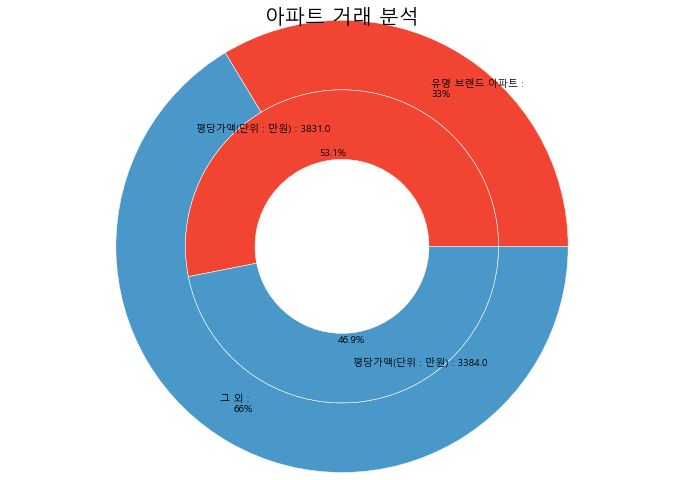

In [32]:
# 상위 10개 기업 vs others

named = ['삼성', '래미안', '현대', '힐스테이트', '디에이치', '대우', '푸르지오', '더힐', '대림', 
          '포스코', '더샾', 'GS', '자이', '아이파크', '롯데', '캐슬', 'SK', '뷰', 'LG', '엘지', '부영', 
         '사랑으로', '금호', '에스케이', '타워팰리스', '센트레빌', 'VIEW']

named_cnt = 0
named_price = 0
others = 0
others_price = 0

for i in range(0,len(result)):
    
    for j in range(0,len(named)):
        if(named[j] in result.iloc[i, 8]):
            named_cnt = named_cnt + 1
            named_price = named_price + result.iloc[i, 15]
            break
    if(j == 26):
        others = others + 1
        others_price = others_price + result.iloc[i, 15]

named_avg = named_price/named_cnt
others_avg = others_price/others

# 상위 10개 기업 vs others

plt.rcParams['figure.figsize'] = [12, 8]

named_size = int(((named_cnt/(named_cnt+others))*100))
others_size = int(((others/(named_cnt+others))*100))

group_names = [f"유명 브랜드 아파트 : \n{named_size}%" , f"그 외 : \n{others_size}%"]
group_sizes = [named_cnt, others]
group_colors = ['lightcoral', 'lightskyblue']
group_explodes = (0.1, 0, 0) # explode 1st slice

# info. of subgroups

subgroup_names = [f"평당가액(단위 : 만원) : {named_avg.round(0)}", f"평당가액(단위 : 만원) : {others_avg.round(0)}"]
subgroup_sizes = [named_avg, others_avg]

# colors
a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

# width
width_num = 0.4

# plt.pie(group_sizes, 
# #         explode=group_explodes, 
#         labels=group_names, 
#         colors=group_colors, 
#         autopct='%1.2f%%', # second decimal place
#         shadow=True, 
#         startangle=90,
#         textprops={'fontsize': 14}) # text font size
# plt.axis('equal') #  equal length of X and Y axis

# plt.title('아파트 거래 분석', fontsize=20)
# plt.show()

# Outside Ring

fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,
                        colors=[a(0.6), c(0.6)])
plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='white')

# Inside Ring

pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, 
           radius=(1.3 - width_num), 
           labels=subgroup_names, 
           labeldistance=0.75, 
           autopct='%1.1f%%', 
           colors=[a(0.6), c(0.6)])

plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.title('아파트 거래 분석', fontsize=20)
plt.show()

## 5. 시각화
#### 시각화 그래프는 7개 이상 나와야 합니다.
    - 각각의 그래프마다 분석에 있어서 세웠던 전략과 시각화 목적을 간단한 코멘트를 달아주세요
#### 수업시간에 언급하지 않은 새로운 패턴의 그래프는 3개 이상 사용하시기 바랍니다.
    - 그래프에 대한 간단한 설명과 함께 코멘트로 직접 달아주세요

#### 작업시간은 오후 3시까지 생각하고 있습니다.
    - 최종 발표시간은 4시입니다.